**Amazon Review**

In [11]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [12]:
df=pd.read_csv("/content/sample_data/amazon_review_ID.shuf.lrn.csv", index_col="ID")

In [13]:
#Convert last column to string datatype
df.iloc[:,-1]=df.iloc[:,-1].astype('string')

<ipython-input-13-87e6dcaf0a69>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-1]=df.iloc[:,-1].astype('string')


**Split dataset into x_values and y_values**

In [14]:
x_train=df.iloc[:,:-1]
y_train=df['Class']
x_test=pd.read_csv("/content/sample_data/amazon_review_ID.shuf.tes.csv", index_col="ID")

In [15]:
df_y_pred=pd.read_csv("/content/sample_data/amazon_review_ID.shuf.sol.ex.csv", index_col="ID")
y_test=df_y_pred['Class'].astype("string")

**Naive Bayes**

In [16]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)
scores = cross_val_score(nb_model, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.32       0.27333333 0.24       0.32       0.32666667]
Mean cross-validation score: 0.30


In [17]:
y_pred= nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Agresti       0.00      0.00      0.00         0
   Ashbacher       0.00      0.00      0.00         0
       Auken       0.00      0.00      0.00         0
 Blankenship       0.00      0.00      0.00         0
       Brody       0.00      0.00      0.00         0
       Brown       0.00      0.00      0.00         0
    Bukowsky       0.00      0.00      0.00         0
         CFH       0.00      0.00      0.00         0
   Calvinnme       0.00      0.00      0.00         0
     Chachra       0.00      0.00      0.00         0
    Chandler       0.00      0.00      0.00         0
       Chell       0.00      0.00      0.00         0
    Cholette       0.00      0.00      0.00         0
      Comdet       0.00      0.00      0.00         0
       Cutey       0.00      0.00      0.00         0
    Davisson       0.00      0.00      0.00         0
        Dent       0.00      0.00      0.00         0
    Engineer       0.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN**

In [18]:
# best_n=pd.NA
# best_f1_sum=float('-inf')
# # knn_model=KNeighborsClassifier(n_neighbors=n)
# # knn_model.fit(x_train,y_train )
# # y_pred=knn_model.predict(x_test)
# # precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)
# # f1_score[-1]
# for n in range(1,101):
#     knn_model=KNeighborsClassifier(n_neighbors=n)
#     knn_model.fit(x_train,y_train )
#     y_pred=knn_model.predict(x_test)
#     precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)
#     if np.sum(f1_score)>best_f1_sum:
#         best_n=n
#         best_f1_sum=np.sum(f1_score)
#     print(f1_score[-1])
# print(f"The best amount of neighbours is {best_n}")

params = {
    "n_neighbors": range(10, 100, 10),
    "weights": ["uniform",  "distance"],
    "algorithm": ["ball_tree", "kd_tree"],
}

search = GridSearchCV(KNeighborsClassifier(), param_grid=params, scoring="f1_macro")
search.fit(x_train, y_train)
search.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'}

In [19]:

cs_results = pd.DataFrame.from_records(search.cv_results_["params"])

score_keys = [key for key in search.cv_results_.keys() if str(key).startswith("split")]
for score_key in score_keys:
    cs_results[score_key] = search.cv_results_[score_key]

cs_results["score_mean"] = cs_results[score_keys].mean(axis=1)
cs_results


,algorithm,n_neighbors,weights,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,score_mean
0,ball_tree,10,uniform,0.222662,0.163525,0.171060,0.260006,0.116995,0.186850
1,ball_tree,10,distance,0.250626,0.231140,0.207337,0.299498,0.169022,0.231525
2,ball_tree,20,uniform,0.207485,0.160447,0.131202,0.156568,0.110923,0.153325
3,ball_tree,20,distance,0.277052,0.261767,0.189690,0.213843,0.143135,0.217097
4,ball_tree,30,uniform,0.180093,0.161979,0.121429,0.158513,0.098537,0.144110
5,ball_tree,30,distance,0.238460,0.270417,0.164097,0.159088,0.122923,0.190997
6,ball_tree,40,uniform,0.167872,0.182782,0.137928,0.139053,0.096444,0.144816
7,ball_tree,40,distance,0.224204,0.243364,0.183124,0.146915,0.134918,0.186505
8,ball_tree,50,uniform,0.173195,0.141430,0.133670,0.113282,0.064068,0.125129
9,ball_tree,50,distance,0.203623,0.196544,0.152768,0.150887,0.123259,0.165416


<ipython-input-20-9105dd4380ef>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = cm.get_cmap("RdBu_r")


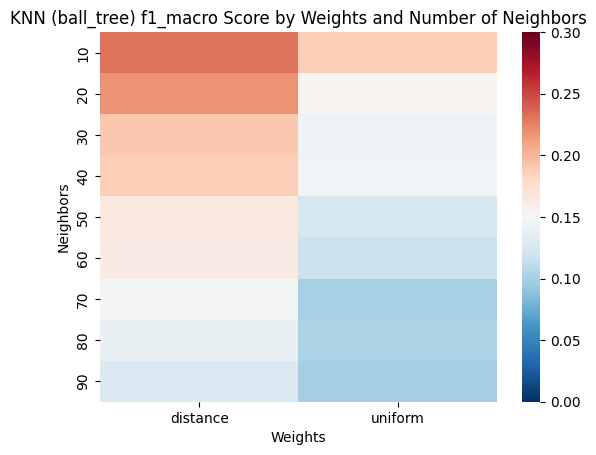

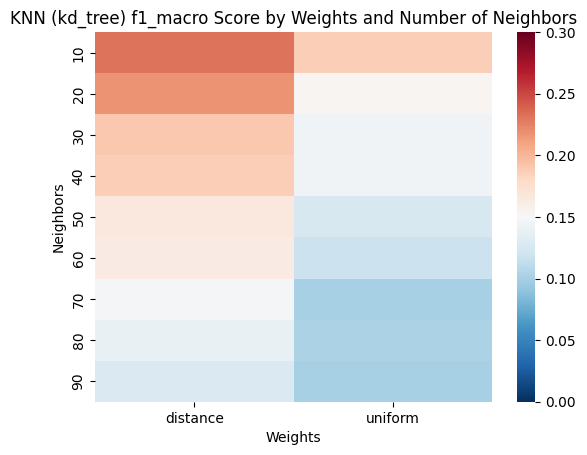

In [20]:
cmap_reversed = cm.get_cmap("RdBu_r")
algorithms = list(cs_results["algorithm"].unique())
cs_heatmaps = []
scoring_criterium = "f1_macro"


for algorithm in algorithms:
    plt.figure()
    cs_heatmaps.append(sns.heatmap(cs_results[cs_results["algorithm"] == algorithm].pivot(index="n_neighbors", columns="weights", values="score_mean"), vmin=0.0, vmax=0.3,cmap=cmap_reversed))
    cs_heatmaps[-1].set_ylabel("Neighbors")
    cs_heatmaps[-1].set_xlabel(f"Weights")
    cs_heatmaps[-1].set_title(f"KNN ({algorithm}) {scoring_criterium} Score by Weights and Number of Neighbors")


In [22]:
knn_model=KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='ball_tree')
knn_model.fit(x_train,y_train )
y_pred=knn_model.predict(x_test)
y_pred
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Agresti       0.00      0.00      0.00         0
   Ashbacher       0.00      0.00      0.00         0
       Auken       0.00      0.00      0.00         0
 Blankenship       0.00      0.00      0.00         0
       Brody       0.00      0.00      0.00         0
       Brown       0.00      0.00      0.00         0
    Bukowsky       0.00      0.00      0.00         0
         CFH       0.00      0.00      0.00         0
   Calvinnme       0.00      0.00      0.00         0
     Chachra       0.00      0.00      0.00         0
    Chandler       0.00      0.00      0.00         0
       Chell       0.00      0.00      0.00         0
    Cholette       0.00      0.00      0.00         0
      Comdet       0.00      0.00      0.00         0
        Corn       0.00      0.00      0.00         0
       Cutey       0.00      0.00      0.00         0
    Davisson       0.00      0.00      0.00         0
        Dent       0.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Random Forest**

In [23]:


params = {
    "n_estimators": range(10, 100, 10),
    "criterion": ["gini",  "entropy"],
    "max_features": ["sqrt", "log2"],
    "max_depth" : [None, 5,10,15],
}

search = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring="f1_macro")
search.fit(x_train, y_train)
search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 70}

In [24]:
# Perform cross-validation
rfc = RandomForestClassifier(criterion= 'gini',max_depth= None,max_features= 'sqrt',n_estimators= 70,random_state=26)
rfc.fit(x_train, y_train)
scores = cross_val_score(rfc ,x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.56666667 0.50666667 0.55333333 0.58666667 0.44666667]
Mean cross-validation score: 0.53


In [25]:
# Make predictions on the test set
y_pred = rfc.predict(x_test)

# Evaluate the model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Agresti       0.00      0.00      0.00         0
   Ashbacher       0.00      0.00      0.00         0
       Auken       0.00      0.00      0.00         0
 Blankenship       0.00      0.00      0.00         0
       Brody       0.00      0.00      0.00         0
       Brown       0.00      0.00      0.00         0
    Bukowsky       0.00      0.00      0.00         0
         CFH       0.00      0.00      0.00         0
   Calvinnme       0.00      0.00      0.00         0
     Chachra       0.00      0.00      0.00         0
    Chandler       0.00      0.00      0.00         0
       Chell       0.00      0.00      0.00         0
    Cholette       0.00      0.00      0.00         0
      Comdet       0.00      0.00      0.00         0
        Corn       0.00      0.00      0.00         0
       Cutey       0.00      0.00      0.00         0
    Davisson       0.00      0.00      0.00         0
        Dent       0.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [13, 14, 13, ...,  5, 20, 24]], dtype=int64)

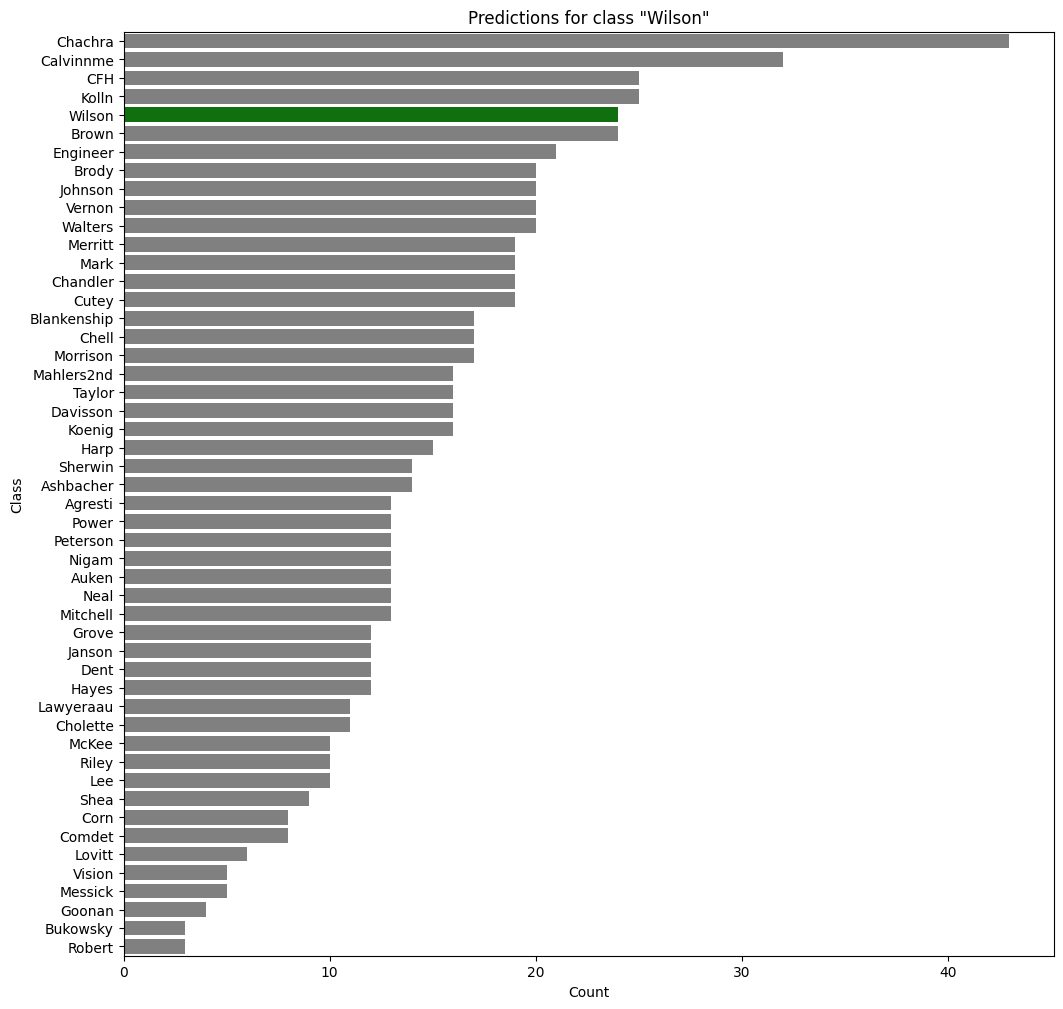

In [ ]:

fig, ax = plt.subplots(figsize=(12, 12))

data = pd.Series(y_pred).value_counts()
colors = ["green" if name == "Wilson" else "grey" for name in data.index]
sns.barplot(x=data.values, y=data.index, ax=ax,  palette=colors)

# Set the x and y axis labels
plt.xlabel('Count')
plt.ylabel('Class')

# Set the title of the plot
plt.title('Predictions for class "Wilson"')

# Display the plot
plt.show()

In [ ]:
y_pred

array(['Wilson', 'Brown', 'Blankenship', 'Calvinnme', 'Messick', 'Nigam',
       'CFH', 'Kolln', 'Johnson', 'Koenig', 'Morrison', 'Neal',
       'Morrison', 'Chachra', 'Kolln', 'Kolln', 'McKee', 'Chell',
       'Calvinnme', 'Mitchell', 'Cholette', 'Chachra', 'Auken', 'Auken',
       'Calvinnme', 'CFH', 'Cutey', 'Blankenship', 'Wilson', 'Koenig',
       'Hayes', 'Mark', 'Chell', 'Chachra', 'Sherwin', 'Cutey', 'Agresti',
       'Ashbacher', 'Auken', 'Shea', 'Wilson', 'Davisson', 'Dent', 'Shea',
       'CFH', 'Kolln', 'Calvinnme', 'Lovitt', 'Walters', 'Sherwin',
       'Comdet', 'CFH', 'Calvinnme', 'Comdet', 'Walters', 'Chachra',
       'Engineer', 'Brown', 'Taylor', 'Dent', 'Johnson', 'Corn', 'Riley',
       'Wilson', 'Chandler', 'Brown', 'Hayes', 'Engineer', 'Nigam',
       'Calvinnme', 'Chell', 'Sherwin', 'Mark', 'Johnson', 'Kolln',
       'Janson', 'Calvinnme', 'Engineer', 'Engineer', 'Shea', 'Mitchell',
       'Brown', 'Lawyeraau', 'Auken', 'Janson', 'Chachra', 'Grove',
       'Hayes